# SIMPLE RNN ARCHITECTURES

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def create_rnn_model(cell_type='vanilla', bidirectional=False, state_size=128):
    model = Sequential()

    if bidirectional:
        if cell_type == 'vanilla':
            model.add(Bidirectional(SimpleRNN(state_size), input_shape=(28, 28)))
        elif cell_type == 'lstm':
            model.add(Bidirectional(LSTM(state_size), input_shape=(28, 28)))
        elif cell_type == 'gru':
            model.add(Bidirectional(GRU(state_size), input_shape=(28, 28)))
    else:
        if cell_type == 'vanilla':
            model.add(SimpleRNN(state_size, input_shape=(28, 28)))
        elif cell_type == 'lstm':
            model.add(LSTM(state_size, input_shape=(28, 28)))
        elif cell_type == 'gru':
            model.add(GRU(state_size, input_shape=(28, 28)))

    # Output layer
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [4]:
def train_and_evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    history = model.fit(
        x_train, y_train, epochs=10, batch_size=64,
        validation_data=(x_val, y_val)
    )

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_accuracy:.4f}")

    return history, test_accuracy


In [5]:
def plot_training_history(history, title=''):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


## TRAINING

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7857 - loss: 0.6975 - val_accuracy: 0.9228 - val_loss: 0.2598
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9391 - loss: 0.2130 - val_accuracy: 0.9583 - val_loss: 0.1466
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9537 - loss: 0.1602 - val_accuracy: 0.9491 - val_loss: 0.1805
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9577 - loss: 0.1470 - val_accuracy: 0.9601 - val_loss: 0.1422
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9655 - loss: 0.1246 - val_accuracy: 0.9625 - val_loss: 0.1408
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9643 - loss: 0.1215 - val_accuracy: 0.9670 - val_loss: 0.1240
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9660 - loss: 0.1150 - val_accuracy: 0.9661 - val_loss: 0.1254
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9704 - loss: 0.1053 - val_accuracy: 0

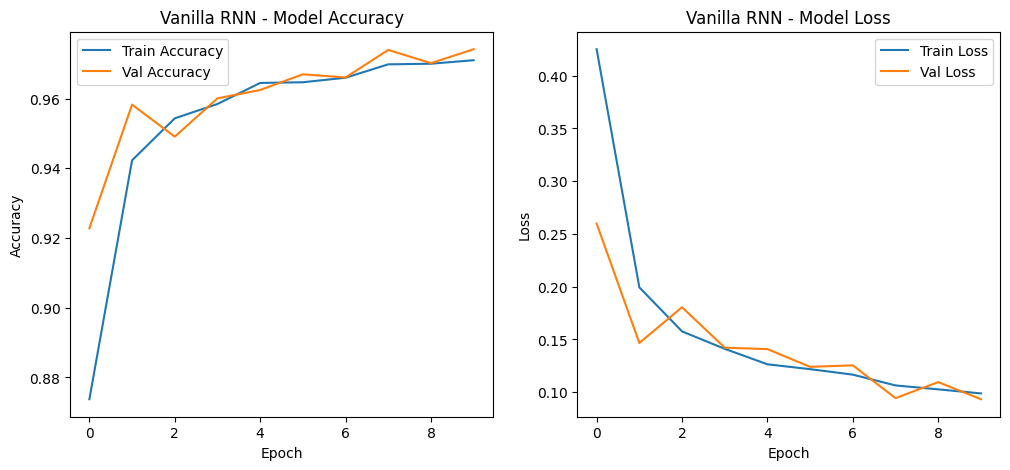

In [6]:
# VANILLA TRAIN
vanilla_rnn_model = create_rnn_model(cell_type='vanilla', bidirectional=False)
vanilla_rnn_history, vanilla_rnn_test_accuracy = train_and_evaluate_model(
    vanilla_rnn_model, x_train, y_train, x_val, y_val, x_test, y_test
)
plot_training_history(vanilla_rnn_history, title='Vanilla RNN')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7189 - loss: 0.8332 - val_accuracy: 0.9515 - val_loss: 0.1563
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9579 - loss: 0.1417 - val_accuracy: 0.9660 - val_loss: 0.1106
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9723 - loss: 0.0899 - val_accuracy: 0.9669 - val_loss: 0.1081
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9772 - loss: 0.0734 - val_accuracy: 0.9758 - val_loss: 0.0806
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9818 - loss: 0.0583 - val_accuracy: 0.9828 - val_loss: 0.0633
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9858 - loss: 0.0454 - val_accuracy: 0.9816 - val_loss: 0.0603
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9829 - val_loss: 0.0575
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9868 - loss: 0.0449 - val_accuracy: 0.

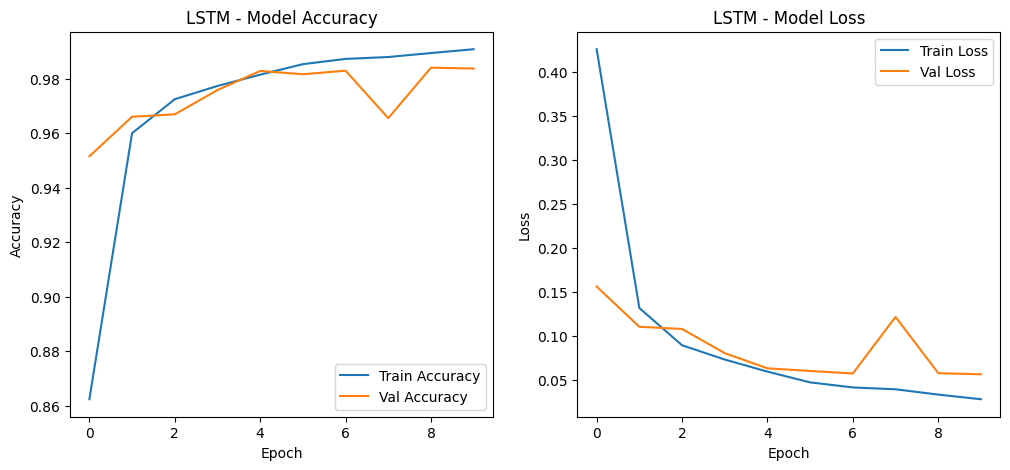

In [7]:
# LSTM TRAIN
lstm_model = create_rnn_model(cell_type='lstm', bidirectional=False)
lstm_history, lstm_test_accuracy = train_and_evaluate_model(
    lstm_model, x_train, y_train, x_val, y_val, x_test, y_test
)
plot_training_history(lstm_history, title='LSTM')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6728 - loss: 0.9312 - val_accuracy: 0.9568 - val_loss: 0.1470
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9552 - loss: 0.1488 - val_accuracy: 0.9660 - val_loss: 0.1115
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9712 - loss: 0.0982 - val_accuracy: 0.9779 - val_loss: 0.0712
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9800 - loss: 0.0700 - val_accuracy: 0.9813 - val_loss: 0.0624
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9829 - loss: 0.0570 - val_accuracy: 0.9822 - val_loss: 0.0598
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9847 - val_loss: 0.0550
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9879 - loss: 0.0381 - val_accuracy: 0.9830 - val_loss: 0.0573
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.

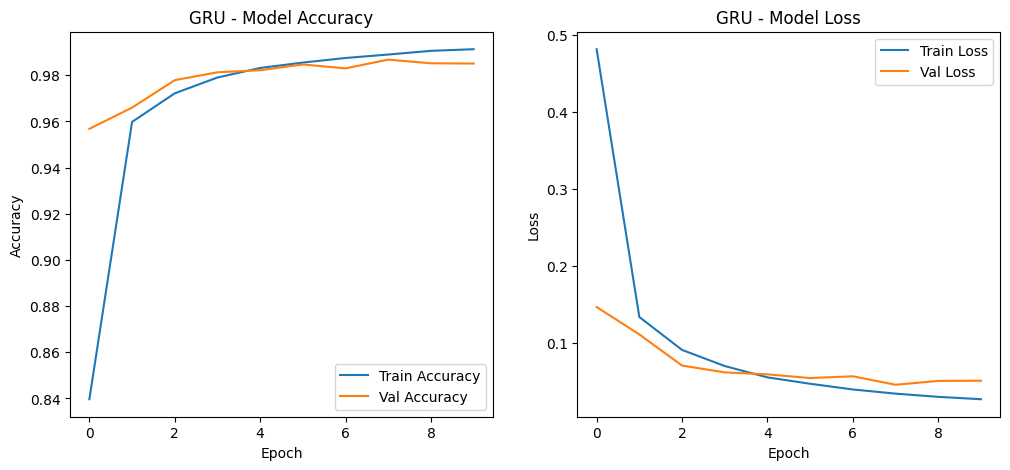

In [8]:
# GRU TRAIN
gru_model = create_rnn_model(cell_type='gru', bidirectional=False)
gru_history, gru_test_accuracy = train_and_evaluate_model(
    gru_model, x_train, y_train, x_val, y_val, x_test, y_test
)
plot_training_history(gru_history, title='GRU')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7424 - loss: 0.7590 - val_accuracy: 0.9532 - val_loss: 0.1527
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9560 - loss: 0.1404 - val_accuracy: 0.9623 - val_loss: 0.1236
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9716 - loss: 0.0937 - val_accuracy: 0.9752 - val_loss: 0.0823
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9796 - loss: 0.0677 - val_accuracy: 0.9776 - val_loss: 0.0738
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9826 - loss: 0.0559 - val_accuracy: 0.9821 - val_loss: 0.0579
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9851 - loss: 0.0458 - val_accuracy: 0.9834 - val_loss: 0.0590
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9873 - loss: 0.0397 - val_accuracy: 0.9821 - val_loss: 0.0603
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9881 - loss: 0.0384 - val_accuracy:

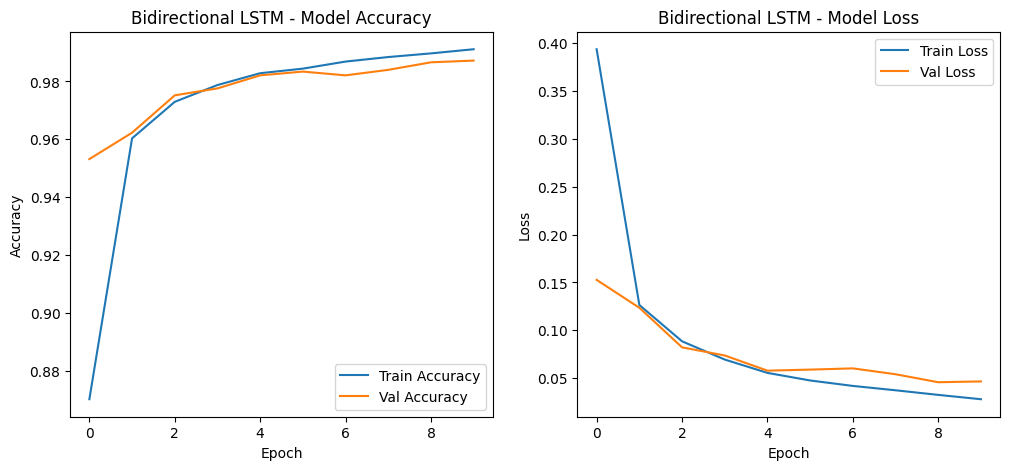

In [9]:
# Bidirectional LSTM
bi_lstm_model = create_rnn_model(cell_type='lstm', bidirectional=True)
bi_lstm_history, bi_lstm_test_accuracy = train_and_evaluate_model(
    bi_lstm_model, x_train, y_train, x_val, y_val, x_test, y_test
)
plot_training_history(bi_lstm_history, title='Bidirectional LSTM')

## Predictions

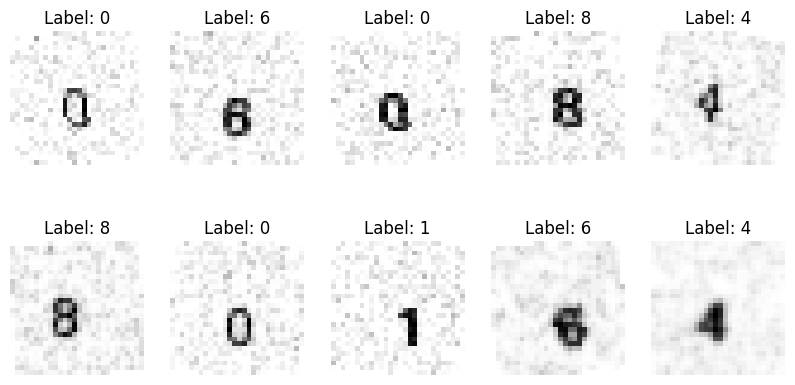

In [18]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_better_mnist_like_digit_images(num_images=10):
    custom_images = []
    labels = np.random.randint(0, 10, size=num_images)

    # Load a sans-serif font, fallback to default if unavailable
    try:
        font = ImageFont.truetype("arial.ttf", 22)
    except IOError:
        font = ImageFont.load_default()

    for digit in labels:
        # Create a blank white 28x28 image
        image = Image.new('L', (28, 28), color=255)
        draw = ImageDraw.Draw(image)

        # Randomize font thickness by redrawing the character
        text = str(digit)
        text_bbox = draw.textbbox((0, 0), text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_position = (
            (28 - text_width) // 2 + random.randint(-2, 2),
            (28 - text_height) // 2 + random.randint(-2, 2)
        )

        # Draw with slight thickness variations
        for offset in range(random.randint(1, 2)):
            draw.text((text_position[0] + offset, text_position[1]), text, fill=0, font=font)

        # Convert to numpy array and normalize
        image_array = np.array(image) / 255.0

        # Add random noise to simulate pixel imperfections
        noise = np.random.normal(0, 0.1, (28, 28))  # Higher noise level
        image_array = np.clip(image_array + noise, 0, 1)  # Add noise and clip to [0, 1]

        # Convert to PIL and apply transformations
        image = Image.fromarray((image_array * 255).astype(np.uint8))

        # Apply slight blurring to mimic scanned document quality
        image = image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 0.8)))

        # Apply random rotation to simulate natural slant
        rotation_angle = random.uniform(-15, 15)
        image = image.rotate(rotation_angle, fillcolor=255)

        # Final image back to numpy array normalized
        image_array = np.array(image) / 255.0
        custom_images.append(image_array.reshape(28, 28))

    return np.array(custom_images), labels

# Generate and plot the MNIST-like synthetic images
custom_images, custom_labels = generate_better_mnist_like_digit_images(10)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(custom_images[i], cmap='gray')
    plt.title(f"Label: {custom_labels[i]}")
    plt.axis('off')
plt.show()


In [19]:
custom_images = custom_images.reshape(-1, 28, 28)

predictions = bi_lstm_model.predict(custom_images)
predicted_labels = np.argmax(predictions, axis=1)

for i, pred in enumerate(predicted_labels):
    print(f"Image {i+1} - True Label: {custom_labels[i]}, Predicted: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 1 - True Label: 0, Predicted: 0
Image 2 - True Label: 6, Predicted: 0
Image 3 - True Label: 0, Predicted: 0
Image 4 - True Label: 8, Predicted: 0
Image 5 - True Label: 4, Predicted: 0
Image 6 - True Label: 8, Predicted: 8
Image 7 - True Label: 0, Predicted: 0
Image 8 - True Label: 1, Predicted: 0
Image 9 - True Label: 6, Predicted: 0
Image 10 - True Label: 4, Predicted: 0


# ADDING 2 BINARY STRINGS

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Function to generate random binary pairs and their sum
def generate_binary_data(batch_size, bit_length):
    X1 = np.random.randint(0, 2, (batch_size, bit_length))
    X2 = np.random.randint(0, 2, (batch_size, bit_length))

    # Calculate the sum and store it with one extra bit for carry-over if needed
    Y = np.zeros((batch_size, bit_length + 1))  # +1 for potential carry bit

    for i in range(batch_size):
        sum_value = int("".join(map(str, X1[i][::-1])), 2) + int("".join(map(str, X2[i][::-1])), 2)
        sum_bin = bin(sum_value)[2:][::-1]  # Convert to binary, reverse for LSB to MSB
        for j, bit in enumerate(sum_bin):
            Y[i, j] = int(bit)

    # Pad the input to match output length
    X1_padded = np.pad(X1, ((0, 0), (0, 1)), mode='constant')
    X2_padded = np.pad(X2, ((0, 0), (0, 1)), mode='constant')

    return np.expand_dims(X1_padded, -1), np.expand_dims(X2_padded, -1), np.expand_dims(Y, -1)

# Define the model
def create_binary_addition_model(state_size=5, bit_length=5):
    model = Sequential()
    model.add(LSTM(state_size, input_shape=(bit_length + 1, 2), return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))  # Single-bit output
    return model

# Function to calculate bit accuracy
def bit_accuracy(y_true, y_pred):
    correct_bits = np.sum((y_true == y_pred).astype(int))
    total_bits = y_true.size
    return correct_bits / total_bits

# Plotting helper function
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



In [13]:
# Experiment 1: Varying State Vector Size
def experiment_varying_state_size(state_sizes, bit_length, batch_size=32, epochs=5):
    for state_size in state_sizes:
        # Generate data
        X1, X2, Y = generate_binary_data(10000, bit_length)
        X = np.concatenate([X1, X2], axis=-1)

        # Initialize and train model
        model = create_binary_addition_model(state_size=state_size, bit_length=bit_length)
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X, Y, epochs=epochs, batch_size=batch_size, validation_split=0.1)

        # Plot training history
        plot_history(history, title=f'State Size: {state_size}')

# Experiment 2: Compare MSE and Cross-Entropy Loss Functions
def experiment_compare_loss_functions(loss_functions, bit_length, batch_size=32, epochs=5):
    for loss_function in loss_functions:
        # Generate data
        X1, X2, Y = generate_binary_data(10000, bit_length)
        X = np.concatenate([X1, X2], axis=-1)

        # Initialize and train model
        model = create_binary_addition_model(state_size=5, bit_length=bit_length)
        model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
        history = model.fit(X, Y, epochs=epochs, batch_size=batch_size, validation_split=0.1)

        # Plot training history
        plot_history(history, title=f'Loss Function: {loss_function}')

# Experiment 3: Train on Fixed Length and Test on Different Lengths
def experiment_train_fixed_test_varied(train_length, test_lengths, batch_size=32, epochs=5):
    # Train on a specific length
    X_train1, X_train2, Y_train = generate_binary_data(10000, train_length)
    X_train = np.concatenate([X_train1, X_train2], axis=-1)

    model = create_binary_addition_model(state_size=5, bit_length=train_length)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

    # Plot training history
    plot_history(history, title=f'Train Length: {train_length}')

    # Test on different lengths
    for test_length in test_lengths:
        X_test1, X_test2, Y_test = generate_binary_data(1000, test_length)
        X_test = np.concatenate([X_test1, X_test2], axis=-1)
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = bit_accuracy(Y_test, y_pred)

        print(f"Train Length: {train_length}, Test Length: {test_length}, Bit Accuracy: {accuracy:.4f}")


Experiment 1: Varying State Size
Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4972 - loss: 0.6921 - val_accuracy: 0.5115 - val_loss: 0.6854
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5024 - loss: 0.6821 - val_accuracy: 0.6268 - val_loss: 0.6682
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6447 - loss: 0.6594 - val_accuracy: 0.6858 - val_loss: 0.6290
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7245 - loss: 0.6098 - val_accuracy: 0.8230 - val_loss: 0.5312
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8531 - loss: 0.4961 - val_accuracy: 0.9425 - val_loss: 0.3728


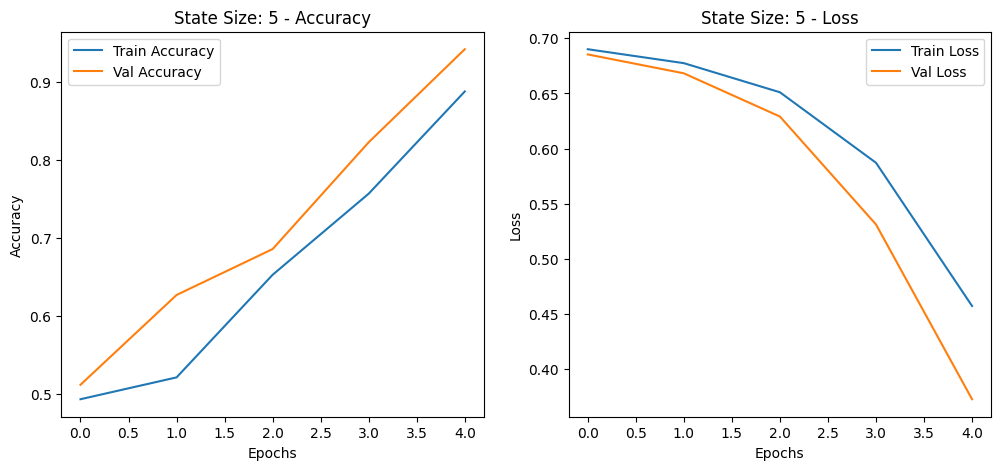

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4746 - loss: 0.6929 - val_accuracy: 0.4270 - val_loss: 0.6796
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5150 - loss: 0.6720 - val_accuracy: 0.6657 - val_loss: 0.6450
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6830 - loss: 0.6391 - val_accuracy: 0.7422 - val_loss: 0.6053
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7450 - loss: 0.5938 - val_accuracy: 0.7865 - val_loss: 0.5330
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8048 - loss: 0.5000 - val_accuracy: 0.8693 - val_loss: 0.3609


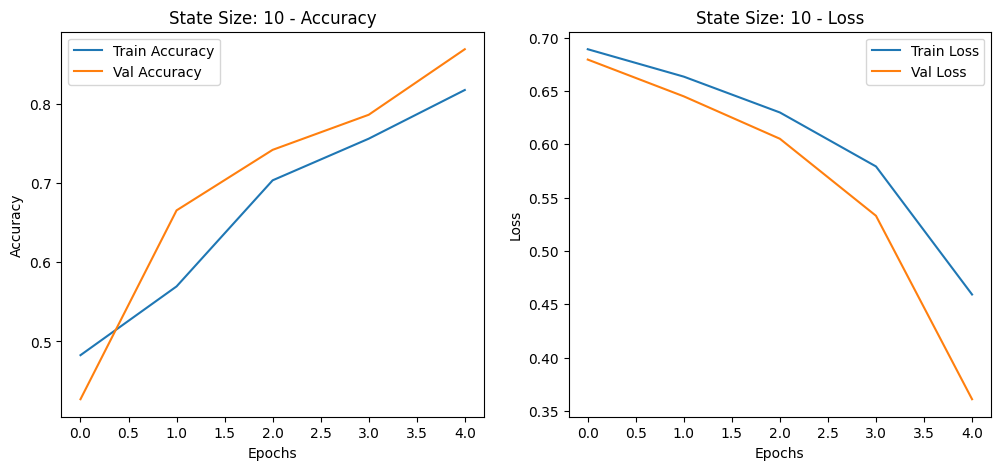

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5287 - loss: 0.6875 - val_accuracy: 0.6110 - val_loss: 0.6599
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6789 - loss: 0.6479 - val_accuracy: 0.7205 - val_loss: 0.6076
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7337 - loss: 0.5831 - val_accuracy: 0.8397 - val_loss: 0.4664
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8869 - loss: 0.4021 - val_accuracy: 0.9880 - val_loss: 0.2302
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9949 - loss: 0.1903 - val_accuracy: 0.9998 - val_loss: 0.1068


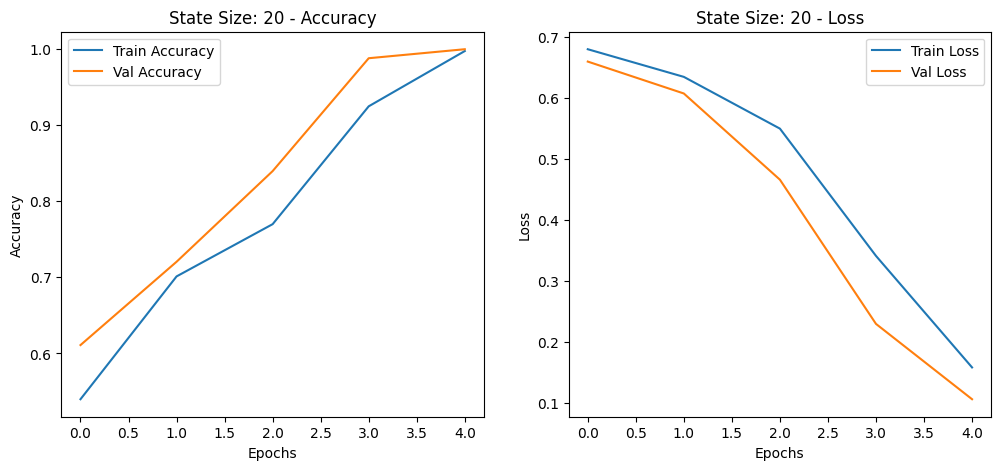


Experiment 2: Comparing Loss Functions
Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5499 - loss: 0.6904 - val_accuracy: 0.6153 - val_loss: 0.6820
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6033 - loss: 0.6770 - val_accuracy: 0.6227 - val_loss: 0.6536
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6600 - loss: 0.6431 - val_accuracy: 0.7403 - val_loss: 0.5934
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7463 - loss: 0.5784 - val_accuracy: 0.7825 - val_loss: 0.5111
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7949 - loss: 0.4902 - val_accuracy: 0.8233 - val_loss: 0.4041


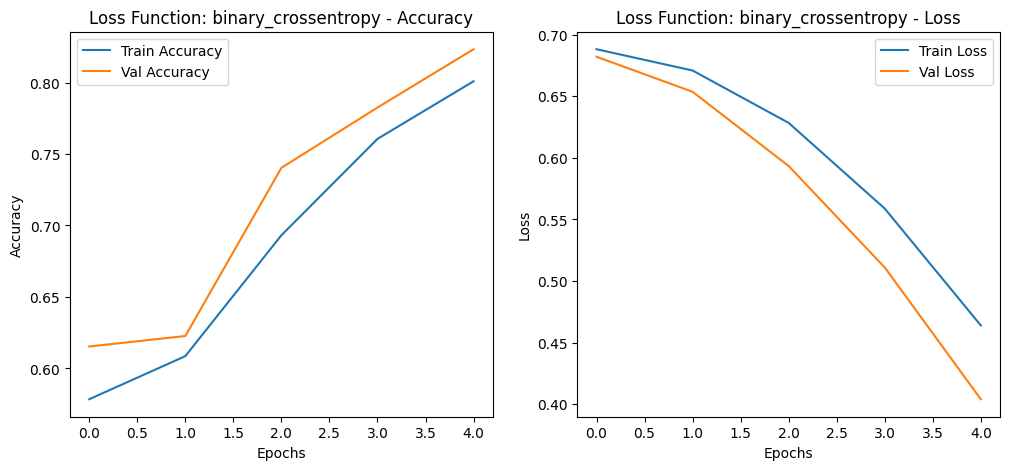

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4278 - loss: 0.2541 - val_accuracy: 0.4583 - val_loss: 0.2483
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5161 - loss: 0.2459 - val_accuracy: 0.6548 - val_loss: 0.2376
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6981 - loss: 0.2324 - val_accuracy: 0.7518 - val_loss: 0.2060
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7920 - loss: 0.1882 - val_accuracy: 0.9177 - val_loss: 0.1277
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9230 - loss: 0.1121 - val_accuracy: 0.9657 - val_loss: 0.0730


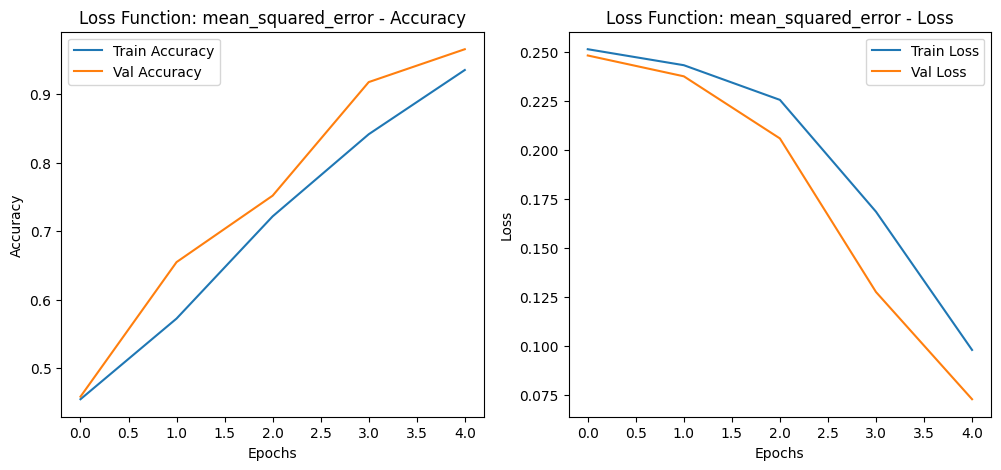


Experiment 3: Train on Fixed Length and Test on Different Lengths
Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5236 - loss: 0.6909 - val_accuracy: 0.5615 - val_loss: 0.6694
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5750 - loss: 0.6572 - val_accuracy: 0.7232 - val_loss: 0.6144
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7497 - loss: 0.5920 - val_accuracy: 0.8275 - val_loss: 0.5232
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.4922 - val_accuracy: 0.8842 - val_loss: 0.4023
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8943 - loss: 0.3666 - val_accuracy: 0.9305 - val_loss: 0.2907


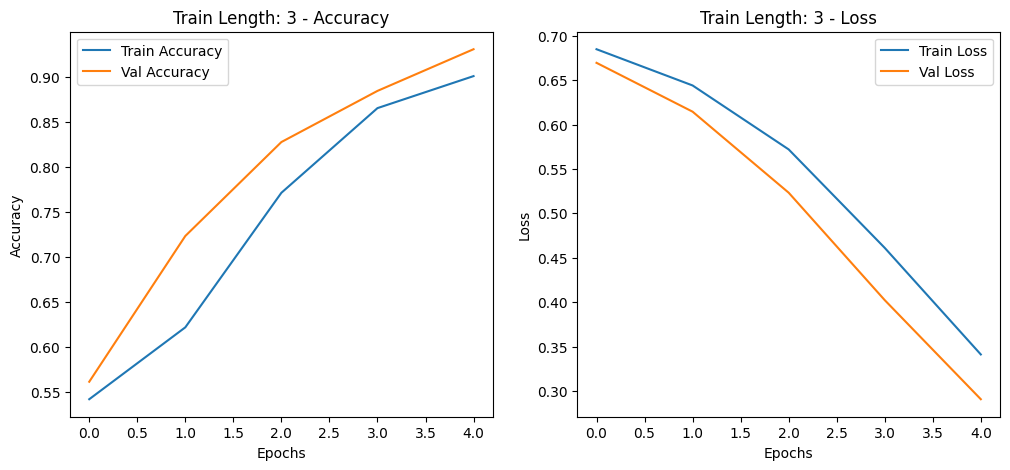

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train Length: 3, Test Length: 2, Bit Accuracy: 0.9567
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Train Length: 3, Test Length: 3, Bit Accuracy: 0.9290
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train Length: 3, Test Length: 5, Bit Accuracy: 0.8408
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Length: 3, Test Length: 8, Bit Accuracy: 0.7434
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Length: 3, Test Length: 10, Bit Accuracy: 0.7095
Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5725 - loss: 0.6889 - val_accuracy: 0.5787 - val_loss: 0.6789
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5802 - loss: 0.6733 - val_accuracy: 0.6917 - val_loss: 0.6480
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6997 - loss: 0.6390 - val_accuracy: 0.7165 - val_loss: 0.6048
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7326 - loss: 0.5931 - val_accuracy: 0.7597 - val_loss: 0.5520
Epoch 5/5
282/282 ━━━━

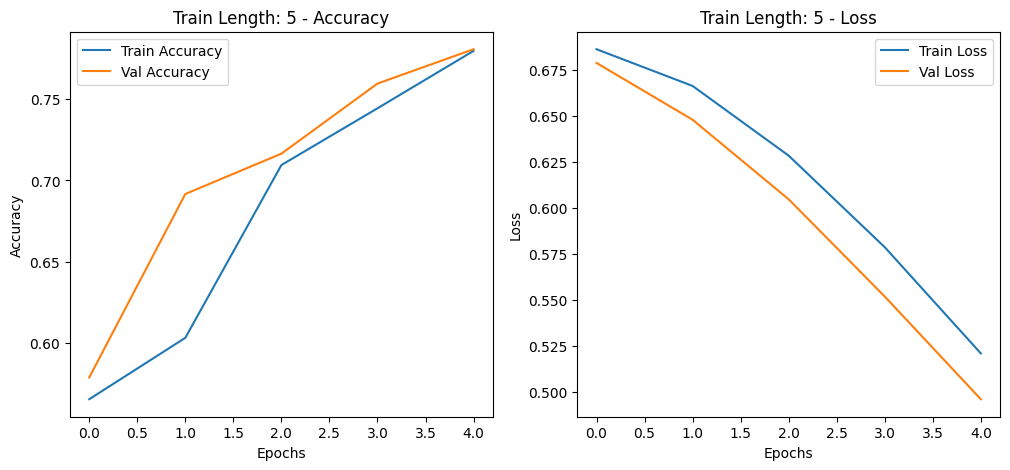

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train Length: 5, Test Length: 2, Bit Accuracy: 0.9353
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Length: 5, Test Length: 3, Bit Accuracy: 0.8692
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train Length: 5, Test Length: 5, Bit Accuracy: 0.7745
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Length: 5, Test Length: 8, Bit Accuracy: 0.7118
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Length: 5, Test Length: 10, Bit Accuracy: 0.6685
Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4842 - loss: 0.6961 - val_accuracy: 0.5099 - val_loss: 0.6909
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5356 - loss: 0.6887 - val_accuracy: 0.5463 - val_loss: 0.6810
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5778 - loss: 0.6748 - val_accuracy: 0.5907 - val_loss: 0.6579
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6031 - loss: 0.6492 - val_accuracy: 0.6535 - val_loss: 0.6262
Epoch 5/5
282/282 ━━━━━

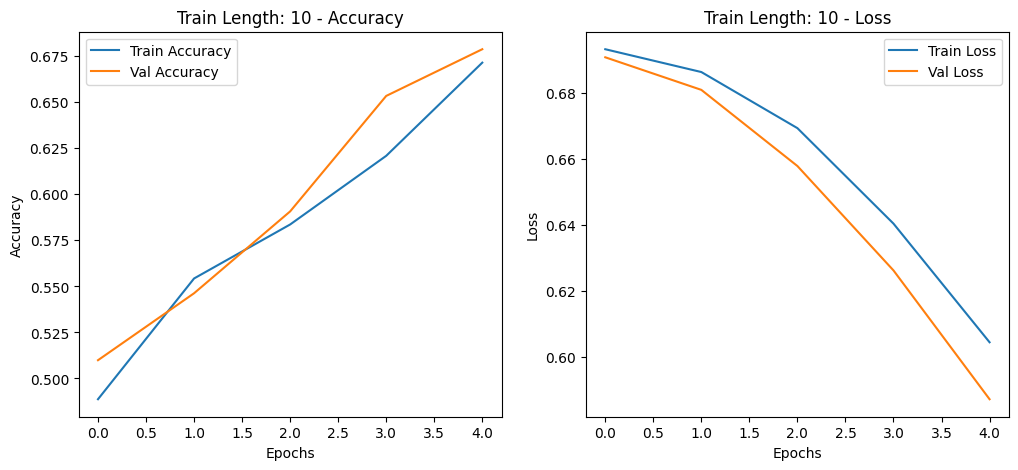

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train Length: 10, Test Length: 2, Bit Accuracy: 0.8617
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Train Length: 10, Test Length: 3, Bit Accuracy: 0.8335
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Length: 10, Test Length: 5, Bit Accuracy: 0.7737
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Length: 10, Test Length: 8, Bit Accuracy: 0.7071
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Length: 10, Test Length: 10, Bit Accuracy: 0.6891


In [14]:
# Run experiments and plot results
state_sizes = [5, 10, 20]
loss_functions = ['binary_crossentropy', 'mean_squared_error']
fixed_lengths = [3, 5, 10]
test_lengths = [2, 3, 5, 8, 10]

print("Experiment 1: Varying State Size")
experiment_varying_state_size(state_sizes, bit_length=5)

print("\nExperiment 2: Comparing Loss Functions")
experiment_compare_loss_functions(loss_functions, bit_length=5)

print("\nExperiment 3: Train on Fixed Length and Test on Different Lengths")
for train_length in fixed_lengths:
    experiment_train_fixed_test_varied(train_length, test_lengths)
